In [171]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from matplotlib import pyplot as plt
import xgboost as xgb
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

In [208]:
# Read data 
df = pd.read_csv('/home/stefan/stef/Disk/Projects/SkillTask2/data/train.csv/train.csv')
df_test = pd.read_csv('/home/stefan/stef/Disk/Projects/SkillTask2/data/test.csv/test.csv')

In [173]:
# Create copy of a dataframe
data = df.copy()

In [174]:
data.head()

,sample_id,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f1603,f1604,f1605,f1606,f1607,f1608,f1609,f1610,f1611,y
0,sample_0,25.609375,6.703125,3.652344,10.039062,169.375,102.8125,1.422852,6.722656,8.015625,...,8.070312,4.363281,5.019531,5.710938,6.343750,6.843750,7.289062,7.617188,7.980469,1.0
1,sample_1,18.343750,5.824219,2.966797,4.902344,164.625,71.8125,1.357422,5.894531,2.753906,...,7.359375,4.195312,4.808594,5.425781,5.949219,6.339844,6.730469,7.074219,7.175781,1.0
2,sample_2,28.562500,6.230469,3.583984,7.882812,159.500,113.1875,1.696289,6.316406,4.605469,...,8.562500,4.523438,5.097656,5.789062,6.457031,6.871094,7.386719,7.878906,8.328125,1.0
3,sample_3,28.062500,6.132812,2.726562,6.378906,169.750,111.0000,1.535156,6.199219,3.712891,...,4.558594,3.533203,3.900391,4.261719,4.042969,3.869141,3.890625,4.042969,4.273438,1.0
4,sample_4,20.109375,6.144531,3.203125,6.035156,164.750,78.8750,1.281250,6.187500,4.003906,...,6.613281,4.625000,4.996094,5.328125,5.593750,5.800781,6.027344,6.242188,6.449219,0.0


In [175]:
# Get general information about the dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Columns: 1614 entries, sample_id to y
dtypes: float64(1613), object(1)
memory usage: 13.5+ MB


In [176]:
# Get basic statistical characteristics
data.describe()

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1603,f1604,f1605,f1606,f1607,f1608,f1609,f1610,f1611,y
count,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,...,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,27.888784,6.307381,3.227237,7.552864,164.607648,114.376398,1.496589,6.370684,5.343339,7.842965,...,5.889956,4.042059,4.502239,4.966580,5.371013,5.514062,5.709822,5.868557,5.932324,0.612785
std,20.639422,0.453696,0.420215,2.447590,4.183401,113.221960,0.261378,0.434857,2.414132,0.407226,...,2.198822,0.472686,0.608721,0.759738,0.930937,1.135693,1.372481,1.590901,1.861157,0.487336
min,13.351562,5.464844,1.333008,1.700195,152.125000,51.500000,0.919434,5.527344,1.461914,7.117188,...,0.000000,0.693359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.609375,6.003906,2.925781,5.779297,162.062500,81.093750,1.363281,6.070312,3.648438,7.574219,...,5.097656,3.794922,4.234375,4.628906,4.980469,5.035156,5.125000,5.164062,5.128906,0.000000
50%,23.984375,6.218750,3.222656,7.242188,164.250000,95.062500,1.450195,6.292969,4.867188,7.765625,...,6.347656,4.085938,4.589844,5.093750,5.542969,5.695312,5.929688,6.136719,6.265625,1.000000
75%,29.320312,6.570312,3.537109,8.980469,166.437500,116.906250,1.574707,6.625000,6.572266,8.070312,...,7.404297,4.335938,4.890625,5.421875,5.929688,6.230469,6.607422,6.935547,7.189453,1.000000
max,328.000000,9.070312,4.847656,21.406250,184.875000,1833.000000,4.468750,8.898438,19.890625,10.382812,...,11.578125,5.230469,6.003906,6.914062,7.800781,8.601562,9.398438,10.179688,10.929688,1.000000


In [177]:
# Let's look at statistics on non-numerical features. All values are unique.
data.describe(include=['object'])

,sample_id
count,1095
unique,1095
top,sample_829
freq,1


In [178]:
# Check label values
data['y'].unique()

array([1., 0.])

In [179]:
# Check if any columns are empty
col_names = data.columns
for col in col_names:
    if data[col].empty:
        print(f'DataFrame column {name} is empty!')

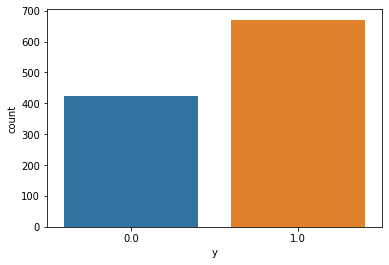

In [180]:
# Check class distribution
sns.countplot(data['y'],label="Sum")
plt.show()

In [181]:
# Replace inf values with np.nan, then replace nan with 0
data.replace([np.inf, -np.inf], np.nan,inplace=True)
data = data.fillna(0) # Check mean

In [182]:
# Check if contains null values
data.isnull().values.any()

False

In [183]:
print("All values are finite: ", np.all(np.isfinite(data.iloc[:,1:].head())))

All values are finite:  True


### Normalize features and split data

In [184]:
# Features
X = data.drop(['sample_id', 'y'], axis=1)
# Labels
y = data['y']

In [220]:
X

,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f1602,f1603,f1604,f1605,f1606,f1607,f1608,f1609,f1610,f1611
0,25.609375,6.703125,3.652344,10.039062,169.375,102.8125,1.422852,6.722656,8.015625,8.109375,...,3.675781,8.070312,4.363281,5.019531,5.710938,6.343750,6.843750,7.289062,7.617188,7.980469
1,18.343750,5.824219,2.966797,4.902344,164.625,71.8125,1.357422,5.894531,2.753906,7.406250,...,3.636719,7.359375,4.195312,4.808594,5.425781,5.949219,6.339844,6.730469,7.074219,7.175781
2,28.562500,6.230469,3.583984,7.882812,159.500,113.1875,1.696289,6.316406,4.605469,7.753906,...,3.806641,8.562500,4.523438,5.097656,5.789062,6.457031,6.871094,7.386719,7.878906,8.328125
3,28.062500,6.132812,2.726562,6.378906,169.750,111.0000,1.535156,6.199219,3.712891,7.664062,...,3.156250,4.558594,3.533203,3.900391,4.261719,4.042969,3.869141,3.890625,4.042969,4.273438
4,20.109375,6.144531,3.203125,6.035156,164.750,78.8750,1.281250,6.187500,4.003906,7.734375,...,4.160156,6.613281,4.625000,4.996094,5.328125,5.593750,5.800781,6.027344,6.242188,6.449219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,19.218750,5.921875,2.789062,5.804688,163.625,75.3750,1.369141,5.988281,3.048828,7.503906,...,3.761719,5.234375,4.250000,4.792969,5.246094,5.667969,5.792969,5.960938,5.839844,5.410156
1091,25.484375,6.867188,3.023438,9.023438,171.250,100.6250,1.202148,6.851562,8.328125,8.351562,...,3.332031,3.931641,3.738281,3.931641,4.218750,4.613281,4.828125,5.011719,4.812500,4.343750
1092,27.312500,6.921875,3.406250,10.750000,170.875,108.1250,1.321289,6.921875,8.125000,8.351562,...,3.332031,6.003906,3.921875,4.410156,4.898438,5.347656,5.558594,5.496094,5.703125,5.925781
1093,31.781250,6.289062,3.357422,7.660156,161.250,126.1250,1.718750,6.371094,5.511719,7.835938,...,3.177734,5.933594,3.789062,4.367188,4.953125,5.429688,5.714844,6.066406,6.386719,5.917969


In [221]:
# Features normalization
features_norm = StandardScaler() 
X_std = features_norm.fit_transform(X) 


In [222]:
# Split data in train/test
X_train, x_test, Y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

### Train base models using cross-validation

In [224]:
# Random forest classifier
rf = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_rf = cross_validate(rf, X_std, y, scoring=scoring, cv=5)

sorted(scores_rf.keys())
forest_fit_time = scores_rf['fit_time'].mean()
forest_score_time = scores_rf['score_time'].mean()
forest_accuracy = scores_rf['test_accuracy'].mean()
forest_precision = scores_rf['test_precision_macro'].mean()
forest_recall = scores_rf['test_recall_macro'].mean()
forest_f1 = scores_rf['test_f1_weighted'].mean()
forest_roc = scores_rf['test_roc_auc'].mean()

In [225]:
# XGBoost classifier
xgb_clf = XGBClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_xgb = cross_validate(xgb_clf, X_std, y, scoring=scoring, cv=5)

sorted(scores_xgb.keys())
XGB_fit_time = scores_xgb['fit_time'].mean()
XGB_score_time = scores_xgb['score_time'].mean()
XGB_accuracy = scores_xgb['test_accuracy'].mean()
XGB_precision = scores_xgb['test_precision_macro'].mean()
XGB_recall = scores_xgb['test_recall_macro'].mean()
XGB_f1 = scores_xgb['test_f1_weighted'].mean()
XGB_roc = scores_xgb['test_roc_auc'].mean()

In [226]:
# Support vector machine
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_svm = cross_validate(SVM, X_std, y, scoring=scoring, cv=5)

sorted(scores_svm.keys())
SVM_fit_time = scores_svm['fit_time'].mean()
SVM_score_time = scores_svm['score_time'].mean()
SVM_accuracy = scores_svm['test_accuracy'].mean()
SVM_precision = scores_svm['test_precision_macro'].mean()
SVM_recall = scores_svm['test_recall_macro'].mean()
SVM_f1 = scores_svm['test_f1_weighted'].mean()
SVM_roc = scores_svm['test_roc_auc'].mean()

In [227]:
# K-Nearest Neighbors
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_knn = cross_validate(KNN, X_std, y, scoring=scoring, cv=5)

sorted(scores_knn.keys())
KNN_fit_time = scores_knn['fit_time'].mean()
KNN_score_time = scores_knn['score_time'].mean()
KNN_accuracy = scores_knn['test_accuracy'].mean()
KNN_precision = scores_knn['test_precision_macro'].mean()
KNN_recall = scores_knn['test_recall_macro'].mean()
KNN_f1 = scores_knn['test_f1_weighted'].mean()
KNN_roc = scores_knn['test_roc_auc'].mean()

In [228]:
# Comparison of algorithms
models_initial = pd.DataFrame({
    'Model'       : ['Support Vector Machine', 'Random Forest', 'XGBClassifier', 'KNN'],
    'Fitting time': [SVM_fit_time, forest_fit_time, XGB_fit_time, KNN_fit_time],
    'Scoring time': [SVM_score_time, forest_score_time, XGB_score_time, KNN_score_time],
    'Accuracy'    : [SVM_accuracy, forest_accuracy, XGB_accuracy, KNN_accuracy],
    'Precision'   : [SVM_precision, forest_precision, XGB_precision, KNN_precision],
    'Recall'      : [SVM_recall, forest_recall, XGB_recall, KNN_recall],
    'F1_score'    : [SVM_f1, forest_f1, XGB_f1, KNN_f1],
    'ROC_AUC'     : [SVM_roc, forest_roc, XGB_roc, KNN_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'ROC_AUC'])

models_initial.sort_values(by='ROC_AUC', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,ROC_AUC
2,XGBClassifier,1.804739,0.017486,0.791781,0.785851,0.769327,0.788812,0.856650
1,Random Forest,1.089714,0.024249,0.784475,0.777886,0.760359,0.781034,0.854026
0,Support Vector Machine,6.571060,0.560143,0.780822,0.777435,0.751675,0.775493,0.847466
3,KNN,0.079326,1.195797,0.747945,0.744433,0.710546,0.738534,0.808416


Text(0, 0.5, 'ROC_AUC')

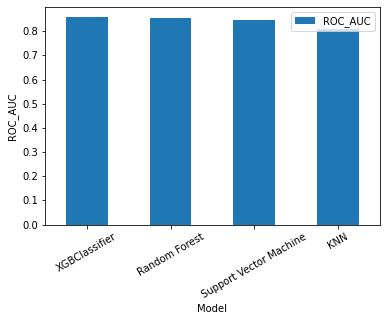

In [229]:
ax = models_initial.sort_values(by='ROC_AUC', ascending=False).plot.bar(x='Model', y='ROC_AUC', rot=30)
ax.set_ylabel("ROC_AUC")

Recap: Random forest has the lowest accuracy, so we will not use it in stacking

### Principal Component Analysis

In [230]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit_transform(X_std)

array([[ 5.85836473e+00,  9.70604189e+00, -7.11514876e+00, ...,
        -8.67501105e-05, -7.23434832e-05,  9.61066251e-16],
       [ 4.94375974e+00, -1.12833929e+01, -8.50030469e+00, ...,
         1.11192179e-04,  9.71016249e-05,  9.61066251e-16],
       [ 2.06230111e+00,  3.73131780e+00, -1.06947536e+01, ...,
         8.76580061e-05,  5.56883164e-05,  9.61066251e-16],
       ...,
       [-1.29728232e+01,  9.59141434e+00,  2.89892651e+00, ...,
        -1.15340067e-06,  1.67811847e-06,  9.61066251e-16],
       [-1.75144327e+01,  4.43930208e+00, -4.42233420e+00, ...,
         2.78577186e-05, -7.75176528e-05,  9.61066251e-16],
       [-8.76734008e+00, -4.56232133e+00, -5.23612193e+00, ...,
         3.90184314e-05,  3.56226415e-04,  9.61066251e-16]])

In [231]:
explained_variance=pca.explained_variance_

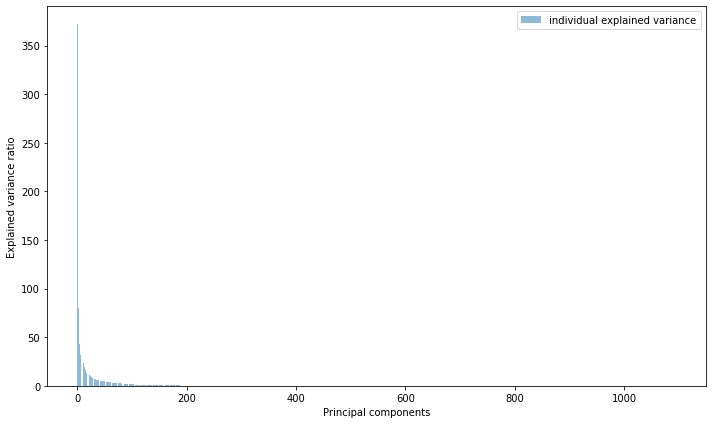

In [232]:
# Plot individual explained variance over components 
plt.figure(figsize=(10, 6))

plt.bar(range(len(explained_variance)), explained_variance, alpha=0.5, align='center',
        label='individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()

In [235]:
pca = PCA(n_components=190)
pca.fit_transform(X_std)

array([[ 5.85836473e+00,  9.70604189e+00, -7.11514876e+00, ...,
        -1.49068407e-01,  3.12015938e-01,  4.01970950e-01],
       [ 4.94375974e+00, -1.12833929e+01, -8.50030469e+00, ...,
         4.81884645e-01, -1.27792305e-02,  1.08617954e-01],
       [ 2.06230111e+00,  3.73131780e+00, -1.06947536e+01, ...,
        -6.11934129e-01, -4.93744161e-01, -6.04122738e-02],
       ...,
       [-1.29728232e+01,  9.59141434e+00,  2.89892651e+00, ...,
         2.38710847e-02,  4.01043054e-01, -4.13624564e-02],
       [-1.75144327e+01,  4.43930208e+00, -4.42233420e+00, ...,
        -5.49886275e-01,  1.66043002e-02, -7.83690998e-01],
       [-8.76734008e+00, -4.56232133e+00, -5.23612193e+00, ...,
        -4.96410687e-01,  9.83611908e-02,  3.97717103e-02]])

In [236]:
print('Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

Explained variance: 0.9851


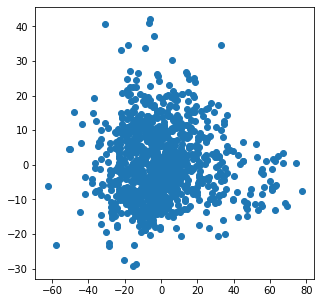

In [238]:
# We can see that the 1st aprox 15 components retains more than 99% of the data.
# Let us take only first 15 principal components and visualise it using K-means clustering
X_std_pca = pca.fit_transform(X_std)
plt.figure(figsize = (5,5))
plt.scatter(X_std_pca[:,0],X_std_pca[:,1])
plt.show()

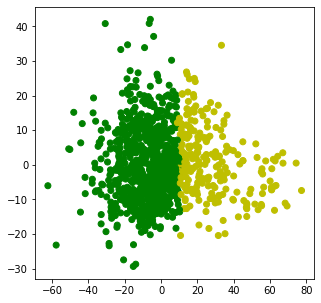

In [239]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=5)
X_clustered = kmeans.fit_predict(X_std_pca)

LABEL_COLOR_MAP = {0 : 'g',
                   1 : 'y'
                  }

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize = (5,5))
plt.scatter(X_std_pca[:,0],X_std_pca[:,1], c= label_color)
plt.show()

In [240]:
# Random forest classifier
rf = RandomForestClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_rf = cross_validate(rf, X_std_pca, y, scoring=scoring, cv=5)

sorted(scores_rf.keys())
forest_fit_time = scores_rf['fit_time'].mean()
forest_score_time = scores_rf['score_time'].mean()
forest_accuracy = scores_rf['test_accuracy'].mean()
forest_precision = scores_rf['test_precision_macro'].mean()
forest_recall = scores_rf['test_recall_macro'].mean()
forest_f1 = scores_rf['test_f1_weighted'].mean()
forest_roc = scores_rf['test_roc_auc'].mean()

In [241]:
# XGBoost classifier
xgb_clf = XGBClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_xgb = cross_validate(xgb_clf, X_std_pca, y, scoring=scoring, cv=5)

sorted(scores_xgb.keys())
XGB_fit_time = scores_xgb['fit_time'].mean()
XGB_score_time = scores_xgb['score_time'].mean()
XGB_accuracy = scores_xgb['test_accuracy'].mean()
XGB_precision = scores_xgb['test_precision_macro'].mean()
XGB_recall = scores_xgb['test_recall_macro'].mean()
XGB_f1 = scores_xgb['test_f1_weighted'].mean()
XGB_roc = scores_xgb['test_roc_auc'].mean()

In [242]:
# Support vector machine
SVM = SVC(probability = True)

scoring = ['accuracy','precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

# Train with cross_validation
scores_svm = cross_validate(SVM, X_std_pca, y, scoring=scoring, cv=5)

sorted(scores_svm.keys())
SVM_fit_time = scores_svm['fit_time'].mean()
SVM_score_time = scores_svm['score_time'].mean()
SVM_accuracy = scores_svm['test_accuracy'].mean()
SVM_precision = scores_svm['test_precision_macro'].mean()
SVM_recall = scores_svm['test_recall_macro'].mean()
SVM_f1 = scores_svm['test_f1_weighted'].mean()
SVM_roc = scores_svm['test_roc_auc'].mean()

In [243]:
# K-Nearest Neighbors
KNN = KNeighborsClassifier()

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']
scores_knn = cross_validate(KNN, X_std_pca, y, scoring=scoring, cv=5)

sorted(scores_knn.keys())
KNN_fit_time = scores_knn['fit_time'].mean()
KNN_score_time = scores_knn['score_time'].mean()
KNN_accuracy = scores_knn['test_accuracy'].mean()
KNN_precision = scores_knn['test_precision_macro'].mean()
KNN_recall = scores_knn['test_recall_macro'].mean()
KNN_f1 = scores_knn['test_f1_weighted'].mean()
KNN_roc = scores_knn['test_roc_auc'].mean()

In [244]:
# Comparison of algorithms
models_pca = pd.DataFrame({
    'Model'       : ['Support Vector Machine', 'Random Forest', 'XGBClassifier', 'KNN'],
    'Fitting time': [SVM_fit_time, forest_fit_time, XGB_fit_time, KNN_fit_time],
    'Scoring time': [SVM_score_time, forest_score_time, XGB_score_time, KNN_score_time],
    'Accuracy'    : [SVM_accuracy, forest_accuracy, XGB_accuracy, KNN_accuracy],
    'Precision'   : [SVM_precision, forest_precision, XGB_precision, KNN_precision],
    'Recall'      : [SVM_recall, forest_recall, XGB_recall, KNN_recall],
    'F1_score'    : [SVM_f1, forest_f1, XGB_f1, KNN_f1],
    'ROC_AUC'     : [SVM_roc, forest_roc, XGB_roc, KNN_roc],
    }, columns = ['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'ROC_AUC'])

models_pca.sort_values(by='ROC_AUC', ascending=False)

,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1_score,ROC_AUC
0,Support Vector Machine,0.641152,0.058450,0.780822,0.777862,0.751240,0.775304,0.847184
2,XGBClassifier,0.308391,0.007105,0.756164,0.748450,0.725992,0.749990,0.819671
3,KNN,0.006514,0.094366,0.751598,0.748801,0.714849,0.742539,0.809271
1,Random Forest,0.572500,0.021313,0.748858,0.749603,0.708219,0.737170,0.807988


Auc has decreased after pca

### Voting classifier

In [278]:
models = [SVC(probability = True), XGBClassifier(), RandomForestClassifier()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [279]:
models_ens = list(zip(['SVM', 'XGB', 'RF'], models))
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train, Y_train)
pred = model_ens.predict(x_test)
prob_voting = model_ens.predict_proba(x_test)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob_voting)

In [280]:
models_ensembling = pd.DataFrame({
    'Model'       : ['Ensembling_soft'],
    'Accuracy'    : [acc_soft],
    'Precision'   : [prec_soft],
    'Recall'      : [recall_soft],
    'F1_score'    : [f1_soft],
    'ROC_AUC'     : [roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'ROC_AUC'])

models_ensembling.sort_values(by='ROC_AUC', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,ROC_AUC
0,Ensembling_soft,0.826484,0.832215,0.905109,0.867133,0.894695


### Feature selection using LinearSVC

In [271]:
lsvc = LinearSVC().fit(X_train, Y_train)
model = SelectFromModel(lsvc, prefit=True)
X_train_svc = model.transform(X_train)
X_train_svc.shape

/home/stefan/anaconda2/envs/ml_env/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


(876, 566)

In [272]:
x_test_svc = model.transform(x_test)
x_test_svc.shape

(219, 566)

In [273]:
models = [SVC(probability = True), XGBClassifier(), RandomForestClassifier()]

scoring = ['accuracy', 'precision_macro', 'recall_macro' , 'f1_weighted', 'roc_auc']

In [274]:
models_ens = list(zip(['SVM', 'XGB', 'KNN'], models))
model_ens = VotingClassifier(estimators = models_ens, voting = 'soft')
model_ens.fit(X_train_svc, Y_train)
pred = model_ens.predict(x_test_svc)
prob = model_ens.predict_proba(x_test_svc)[:,1]

acc_soft = accuracy_score(y_test, pred)
prec_soft = precision_score(y_test, pred)
recall_soft = recall_score(y_test, pred)
f1_soft = f1_score(y_test, pred)
roc_auc_soft = roc_auc_score(y_test, prob)

In [275]:
models_ensembling_features_svc = pd.DataFrame({
    'Model'       : ['Ensembling_soft'],
    'Accuracy'    : [acc_soft],
    'Precision'   : [prec_soft],
    'Recall'      : [recall_soft],
    'F1_score'    : [f1_soft],
    'ROC_AUC'     : [roc_auc_soft],
    }, columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_score', 'ROC_AUC'])

models_ensembling_features_svc.sort_values(by='ROC_AUC', ascending=False)

,Model,Accuracy,Precision,Recall,F1_score,ROC_AUC
0,Ensembling_soft,0.835616,0.838926,0.912409,0.874126,0.887484


### General comparison


In [277]:
model_general = pd.concat([models_initial['Model'], models_initial['ROC_AUC'], 
                           models_pca['Model'], models_pca['ROC_AUC'],
                           models_ensembling['Model'], models_ensembling['ROC_AUC'],
                           models_ensembling_features_svc['Model'], models_ensembling_features_svc['ROC_AUC']
                           ]
                          , axis=1)

model_general.columns = ['Base models', 'AUC 1',
                         'Models PCA', 'AUC 2',
                         'Models ensembling', 'AUC 3',
                        'Features sel. SVC (ensembl)', 'AUC 4']

model_general.sort_values(by='AUC 1', ascending=False)

,Base models,AUC 1,Models PCA,AUC 2,Models ensembling,AUC 3,Features sel. SVC (ensembl),AUC 4
2,XGBClassifier,0.856650,XGBClassifier,0.819671,NaN,NaN,NaN,NaN
1,Random Forest,0.854026,Random Forest,0.807988,NaN,NaN,NaN,NaN
0,Support Vector Machine,0.847466,Support Vector Machine,0.847184,Ensembling_soft,0.890778,Ensembling_soft,0.887484
3,KNN,0.808416,KNN,0.809271,NaN,NaN,NaN,NaN


### Plotting ROC-AUC curve for voting classifier (AUC 3)

In [281]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prob_voting)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.894694676873776

Text(0.5, 0, 'False Positive Rate')

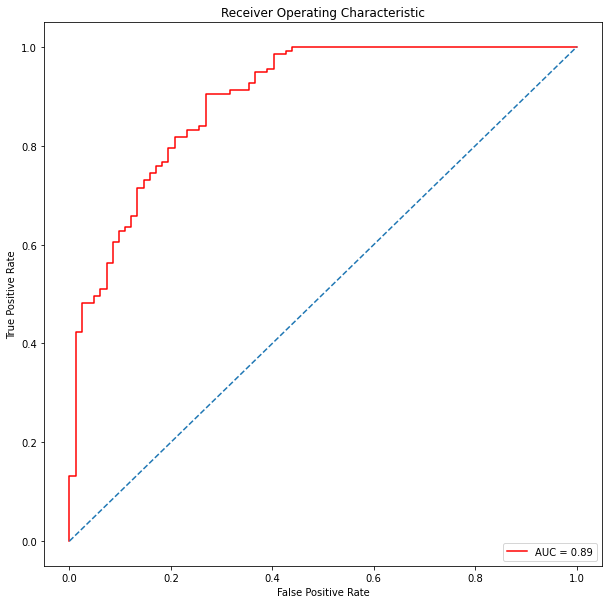

In [282]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Submission

In [285]:
# Replace inf values with np.nan, then replace nan with 0
df_test.replace([np.inf, -np.inf], np.nan,inplace=True)
df_test = df_test.fillna(0) 

# Features
X_submission = df_test.drop(['sample_id'], axis=1)

X_submission_std = features_norm.fit_transform(X_submission) 

answ = model_ens.predict_proba(X_submission_std)[:,1]

submission = pd.DataFrame(df_test["sample_id"], index=None)
submission["y"] = answ
submission.to_csv("submission_local.csv", sep=",", index=False)
submission.head()

,sample_id,y
0,sample_1095,0.049693
1,sample_1096,0.892673
2,sample_1097,0.182610
3,sample_1098,0.729426
4,sample_1099,0.290818
